# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Using past admissions data from UCLA I aim to understand what impact that GPA, GRE, and Prestige of undergraduate school have on the likelihood an applicant will be admitted to UCLA for graduate school.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: NaN values were dropped from the dataset using the drop function in pandas. The data skew was analyzed but no normalization was required. Prestige was put into bins using dummy variables.

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna()
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit']).describe()
print pd.crosstab(df['admit'], df['gre'], rownames=['admit']).describe()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1
prestige          1          2          3          4
count      2.000000   2.000000   2.000000   2.000000
mean      30.500000  74.000000  60.500000  33.500000
std        3.535534  29.698485  45.961941  30.405592
min       28.000000  53.000000  28.000000  12.000000
25%       29.250000  63.500000  44.250000  22.750000
50%       30.500000  74.000000  60.500000  33.500000
75%       31.750000  84.500000  76.750000  44.250000
max       33.000000  95.000000  93.000000  55.000000
gre         220       300       340       360       380       400       420  \
count  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000  2.000000   
mean   0.500000  

### Methods: Write up the methods used in your analysis

Answer: Logistic Regression using admit as the target variable (0/1, not admitted/admitted) was the primary method for prediction used. This was facilitated by statsmodel in Python. The correlation function was used to check for collinearity and histogram / plotting functions were used to better understand the distributions of the data.

### Results: Write up your results

Answer: Results of logistic regression and visualization via plot show gre, gpa, and prestige do indeed affect admissions likelihood. The likelihood of admission increases as gre and gpa increase various levels of prestige cause much different results with admission, from the highest to the least prestigious school there is a major shift in likelihood towards those who went to higher prestige schools. 

### Visuals: Provide a table or visualization of these results

<img src='placeholder.png' height= 25% width= 25%>

<img src='placeholder.png' height= 25% width= 25%>

Optimization terminated successfully.
         Current function value: 0.575009
         Iterations 6


C:\Users\Zane_Harris\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


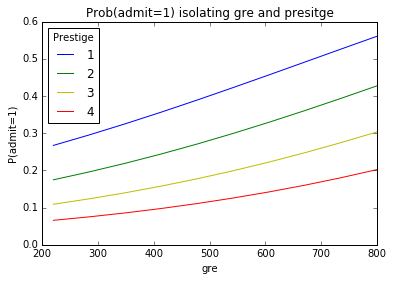

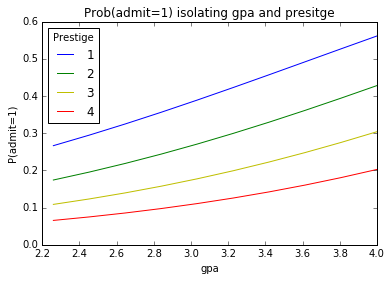

In [62]:
df['intercept'] = 1.0
train_cols = df.columns[1:]
logit = sm.Logit(df['admit'], df[train_cols])
result = logit.fit()
def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

gres = np.linspace(df['gre'].min(), df['gre'].max(), 10)
gpas = np.linspace(df['gpa'].min(), df['gpa'].max(), 10)
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']

cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])
combos['admit_pred'] = result.predict(combos[train_cols])

def isolate_and_plot(variable):
    
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)
    
   
    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()


isolate_and_plot('gre')
isolate_and_plot('gpa')

### Discussion: Write up your discussion and future steps

Answer: 